In [1]:
import cv2
import numpy as np
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3_900.weights")

error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/dnn/src/darknet/darknet_importer.cpp:207: error: (-212:Parsing error) Failed to parse NetParameter file: yolov3.cfg in function 'readNetFromDarknet'


In [2]:
layers_name = net.getLayerNames()
layers_name

NameError: name 'net' is not defined

In [57]:
#get the position of the name of output layers
outputlayer = net.getUnconnectedOutLayers()
#print(outputlayer)

#get the name of the output layers
outputlayers_name = [layers_name[out_name[0]-1] for out_name in outputlayer]
print(outputlayers_name)
#three output layers in different size 

['yolo_82', 'yolo_94', 'yolo_106']


# Load Image and Use Yolov3 to Identify the Image

In [3]:
from PIL import Image
Image.open('13287502908648.jpg')

img = cv2.imread('13287502908648.jpg')
img.shape

FileNotFoundError: [Errno 2] No such file or directory: '13287502908648.jpg'

In [59]:
height, width, c=img.shape
blob = cv2.dnn.blobFromImage(img, 1.0/255.0, (416, 416), (0, 0, 0), True, crop=False)

#set input to the net 
#and then forward our net
net.setInput(blob)
output = net.forward(outputlayers_name)
for i in range(len(output)):
    print(output[i].shape)

(507, 8)
(2028, 8)
(8112, 8)


In [60]:
boxes = []
confidences = []
MaxclassID = []

for per_out in output:
    for temp in per_out:
        x, y, w, h, confidence = temp[:5]
        classID = temp[5:]
        max_index = np.argmax(classID)
        if confidence>0.3:
            w = int(w*width)
            h = int(h*height)
            x = int(x*width)-w/2
            y = int(y*height)-h/2
            
            boxes.append([int(x), int(y), int(w), int(h)])
            confidences.append(float(confidence))
            MaxclassID.append(max_index)
            #print([x, y, w, h], confidence, max_index, end = "\n")
#print(len(boxes))
box_index = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.4)
print(box_index)

[[0]
 [1]]


In [61]:
with open("obj.names") as f:
    object_type = [type_n.strip() for type_n in f]   
#none->blue, bad->red, good->green
colors =  [(0, 0, 255), (255, 0, 0), (0, 255, 0)]
FONT = cv2.FONT_HERSHEY_PLAIN

for i in range(len(boxes)):
    if i in box_index:
        x, y, w, h = boxes[i]
        lb = str(object_type[MaxclassID[i]])
        col = colors[MaxclassID[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), col, 2)
        cv2.putText(img, lb, (x, y-10), FONT, 10, col, 3)
#print(object_type)

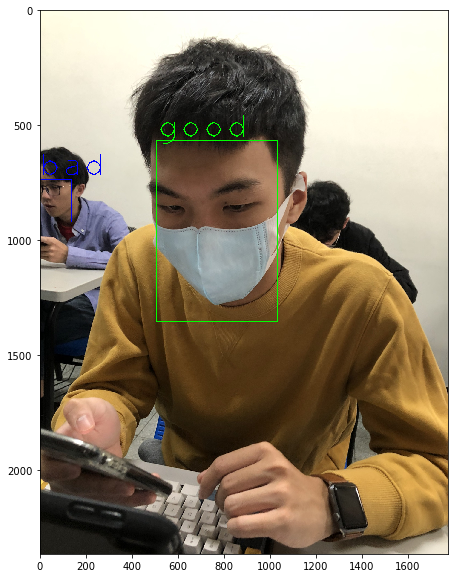

In [64]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)